In [17]:
# import Pkg; Pkg.add("Plots")
# import Pkg; Pkg.add("ProgressMeter")

# import Pkg; Pkg.add("PolyChaos")
# import Pkg; Pkg.add("NDTensors")
# import Pkg; Pkg.add("Observers")
# import Pkg; Pkg.add("JLD2")
import Pkg; Pkg.add("ProgressBars")

   Resolving package versions...
   Installed ProgressBars ─ v1.5.1
    Updating `~/.julia/environments/v1.11/Project.toml`
  [49802e3a] + ProgressBars v1.5.1
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [49802e3a] + ProgressBars v1.5.1
Precompiling project...
    912.3 ms  ✓ ProgressBars
  1 dependency successfully precompiled in 2 seconds. 455 already precompiled.


In [18]:
# Including useful packages
using Plots
using LinearAlgebra
using ProgressMeter
using PolyChaos
using ITensors
using NDTensors
using ITensorMPS
using Observers
using JLD2
using Base.Threads
# Including custom packages
include("Chain_mapping_module.jl")
include("HamiltonianBuilding.jl")
using .Chain_mapping
using .HamiltonianBuilding

In [22]:
function initialise_params(P::Base_params)
    P.N_L = 0
    P.N_R = 100
    P.Ns = 1
    P.N_chain = 50
    P.β_L = 10
    P.β_R = 10
    P.μ_L = 0.1
    P.μ_R = 0.1
    P.Γ_L = 0.01
    P.Γ_R = 0.01
    P.D = 1
    P.spec_fun_type = "ellipse"
    P.symmetry_subspace = "Number conserving"
    P.bath_mode_type = "Fermion"
    P.sys_mode_type = "Fermion"
    P.ϵ = 0
    P.tc = 0
    P.init_occ = 0
    P.U = 0
    P.δt = 0.1
    P.T = 50
    P.Kr_cutoff = 1e-10
    P.k1 = 3
    P.τ_Krylov = 1
    P.tdvp_cutoff = 1e-9
    P.minbonddim = 10
    P.maxbonddim = 100
    P.T_enrich = 5
    P.n_enrich = 5
    return P
end


initialise_params (generic function with 1 method)

In [23]:
P = Base_params()
P = initialise_params(P)
# resetting some parameters?
P.β_L = 10
P.β_R = 10
P.D = 1
P.Γ_R = 0.1
P.init_occ = 0
P.T = 5
P.tdvp_cutoff = 1e-10
DP = DP_initialisation(P);


norm(ψ_init) = 1.0


In [ ]:

##propagates MPS given two sets of paarmeters
ψ, obs = propagate_MPS(P, DP;enrich_bool=true)
MPS_corrs = obs.corr

##propagates single particle correlation matrix
exact_corrs = propagate_correlations(P,DP)

exact_den = [corr[1,1] for corr in exact_corrs]
MPS_den = [corr[1,1] for corr in MPS_corrs]
Plots.plot(DP.times,real.(exact_den),label="Exact",lw=2)
Plots.plot!(DP.times,real.(MPS_den),label="MPS",lw=2,linestyle=:dash,xlabel="Time",ylabel="Density")

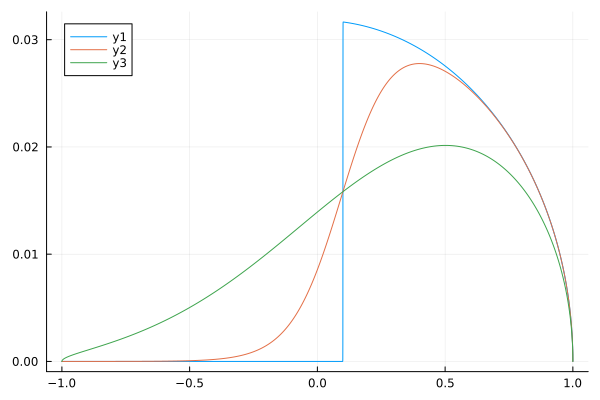

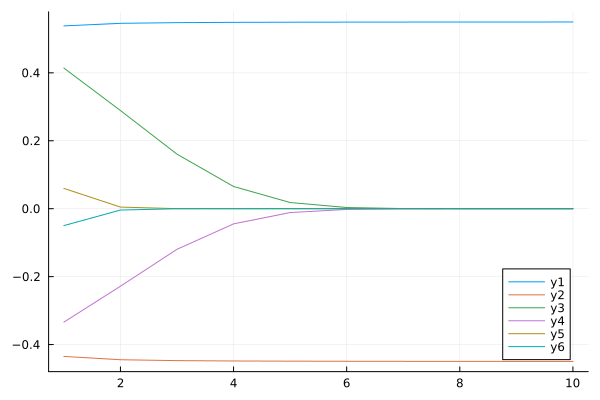

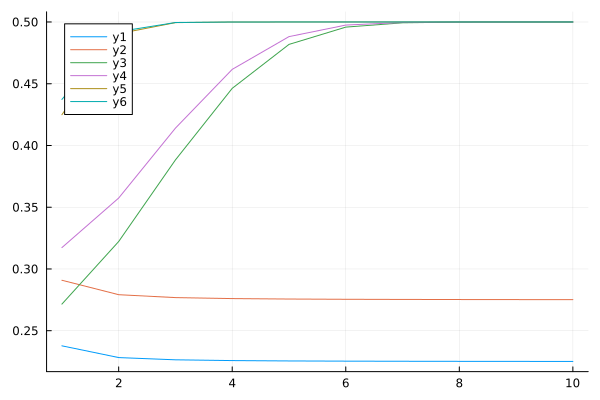

In [7]:
###Reproducing Figure 1 in https://iopscience.iop.org/article/10.1088/1742-5468/ac729b/pdf


##My definition of Γ is different by a factor of π/2
P.Γ_R = 0.157
P.β_R = 10000
w = LinRange(-P.D,P.D,10000)

side = "right"
t_empty_1,E_empty_1 = orthopol_chain(1,side,P)
t_filled_1,E_filled_1 = orthopol_chain(2,side,P)
J1 = spectral_function(w,1,"right",P)

P.β_R = 10
t_empty_2,E_empty_2 = orthopol_chain(1,side,P)
t_filled_2,E_filled_2 = orthopol_chain(2,side,P)
J2 = spectral_function(w,1,"right",P)

P.β_R = 2.5
t_empty_3,E_empty_3 = orthopol_chain(1,side,P)
t_filled_3,E_filled_3 = orthopol_chain(2,side,P)
J3 = spectral_function(w,1,"right",P)

Plots.plot(w,J1)
Plots.plot!(w,J2)
display(Plots.plot!(w,J3))

Plots.plot(real.(E_empty_1[2:11]))
Plots.plot!(real.(E_filled_1[2:11]))
Plots.plot!(real.(E_empty_2[2:11]))
Plots.plot!(real.(E_filled_2[2:11]))
Plots.plot!(real.(E_empty_3[2:11]))
display(Plots.plot!(real.(E_filled_3[2:11])))

Plots.plot(real.(t_empty_1[2:11]))
Plots.plot!(real.(t_filled_1[2:11]))
Plots.plot!(real.(t_empty_2[2:11]))
Plots.plot!(real.(t_filled_2[2:11]))
Plots.plot!(real.(t_empty_3[2:11]))
Plots.plot!(real.(t_filled_3[2:11]))